### **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns    ### import all the libraries
from  sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from sklearn.preprocessing import StandardScaler

In [2]:
telecom = pd.read_csv("telecom_customer_segmentation.csv")

A telecom company wants to segment its customer base to provide personalized services and offers. The goal is to group similar customers together based on their usage behavior, demographics, and preferences using clustering techniques. This segmentation will help the company better target marketing campaigns, reduce churn, and improve customer satisfaction.

## **Data Pre-Processing**

In [3]:
telecom[telecom.duplicated()] #no duplicates 

,Region,Gender,SubscriptionType,InternetUsageType,CustomerSupportCalls,ContractType,MonthlyCharges,TotalCharges,CallMinutesPerMonth,InternetGBPerMonth,NumberOfSMSPerMonth,TenureMonths,Age


In [4]:
telecom.isnull().sum() #no null values 

Region                  0
Gender                  0
SubscriptionType        0
InternetUsageType       0
CustomerSupportCalls    0
ContractType            0
MonthlyCharges          0
TotalCharges            0
CallMinutesPerMonth     0
InternetGBPerMonth      0
NumberOfSMSPerMonth     0
TenureMonths            0
Age                     0
dtype: int64

In [5]:
### do the encoding for the categorical columns

In [6]:
telecom.select_dtypes(include="object").columns

Index(['Region', 'Gender', 'SubscriptionType', 'InternetUsageType',
       'CustomerSupportCalls', 'ContractType'],
      dtype='object')

In [7]:
cat = telecom.select_dtypes(include="object").columns

In [8]:
#checking different numbers of unique values in each category 
for i in cat:
    print(telecom[i].unique())

['West' 'Central' 'East' 'South' 'North-East' 'North']
['Other' 'Male' 'Female']
['Postpaid' 'Prepaid']
['Light' 'Heavy' 'Moderate']
['High' 'Medium' 'Low']
['Monthly' 'Quarterly' 'Yearly']


In [9]:
##encoding columns 
## 1st Region has 6 unique values and are nominal in nature 
## using one-hot dummy encoding 
pd.get_dummies(telecom["Region"]).astype("int64") #astype is used to convert bool to numeric 


,Central,East,North,North-East,South,West
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
99995,0,0,0,1,0,0
99996,1,0,0,0,0,0
99997,0,0,0,0,0,1
99998,0,0,1,0,0,0


In [10]:
## adding the encoded columns and dropping the actual column i.e. Region
telecom=pd.concat([pd.get_dummies(telecom["Region"]).astype("int64"),telecom],axis=1)
telecom.drop("Region",axis=1,inplace=True)

In [11]:
## similary columns ContractType and Gender are nominal in nature 
telecom=pd.concat([pd.get_dummies(telecom["Gender"]).astype("int64"),telecom],axis=1)
telecom.drop("Gender",axis=1,inplace=True)

In [12]:
telecom=pd.concat([pd.get_dummies(telecom["ContractType"]).astype("int64"),telecom],axis=1)
telecom.drop("ContractType",axis=1,inplace=True)

In [13]:
telecom["CustomerSupportCalls"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [14]:
## Columns : CustomerSupportCalls,InternetUsageType are ordinal in nature so 
### using label encoding using lambda function
telecom["CustomerSupportCalls"]=telecom["CustomerSupportCalls"].apply(lambda x:
                                                                     3 if x=="High"
                                                                     else 2 
                                                                     if x=='Medium'
                                                                     else 1)

In [15]:
telecom["InternetUsageType"]=telecom["InternetUsageType"].apply(lambda x:
                                                                     3 if x=="Heavy"
                                                                     else 2 
                                                                     if x=='Moderate'
                                                                     else 1)

In [16]:
telecom["CustomerSupportCalls"].unique()

array([3, 2, 1])

In [17]:
pd.set_option("display.max_columns",None)

In [18]:
telecom.head(1)

,Monthly,Quarterly,Yearly,Female,Male,Other,Central,East,North,North-East,South,West,SubscriptionType,InternetUsageType,CustomerSupportCalls,MonthlyCharges,TotalCharges,CallMinutesPerMonth,InternetGBPerMonth,NumberOfSMSPerMonth,TenureMonths,Age
0,1,0,0,0,0,1,0,0,0,0,0,1,Postpaid,1,3,28.06,718.32,537.64,23.55,58.0,23,74


In [19]:
telecom["SubscriptionType"]=telecom["SubscriptionType"].apply(lambda x:1 if x=='Postpaid'
                                                             else 0)

In [20]:
## Scale the data using Standard Scaler 

In [21]:
Sample= telecom.sample(10000,random_state=34)

In [22]:
s= StandardScaler()

In [23]:
for i in telecom.columns:
    telecom[i]=s.fit_transform(telecom[[i]])

In [24]:
wcss=[]

In [25]:
for i in range(2,7):
    k = KMeans(n_clusters=i,random_state=34)
    k.fit(telecom)
    wcss.append(k.inertia_)
    

In [26]:
import matplotlib.pyplot as plt

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


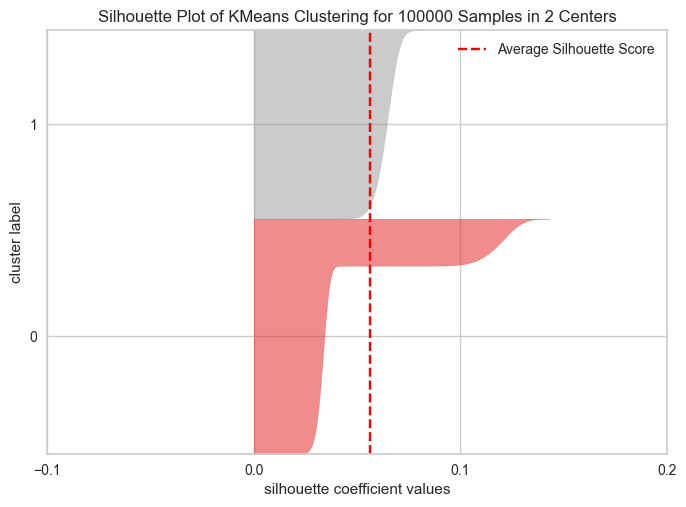

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


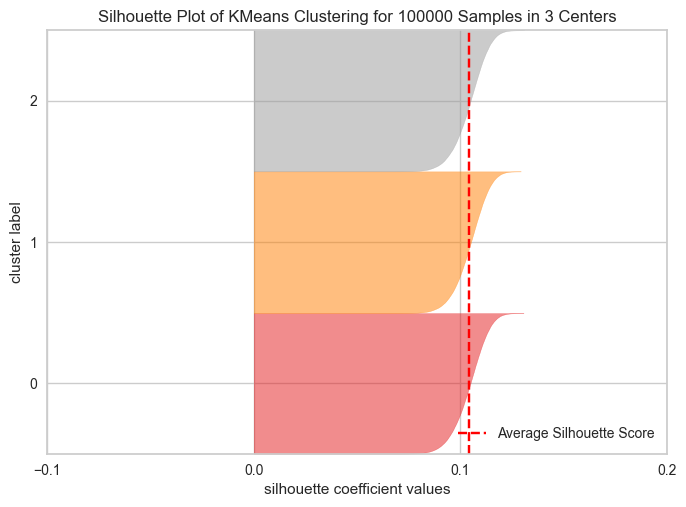

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


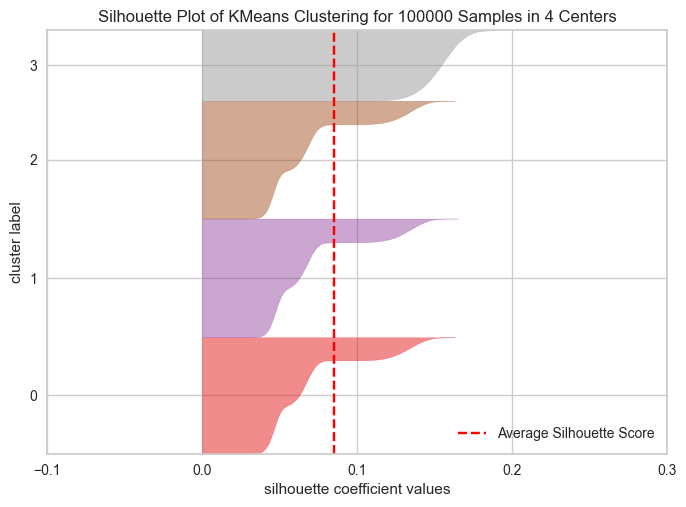

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


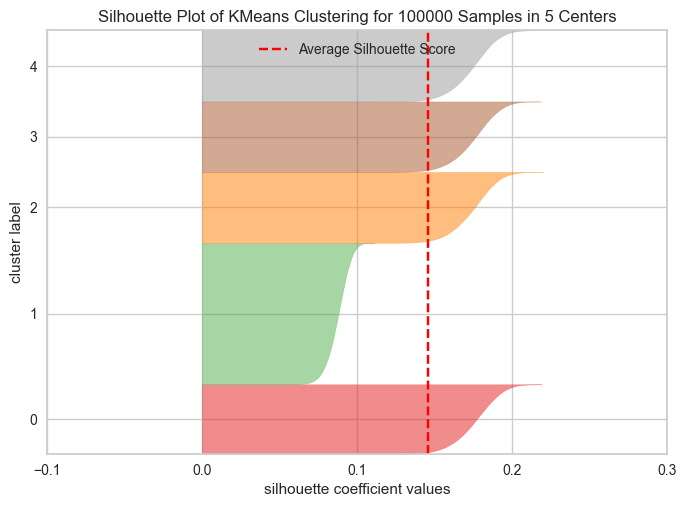

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


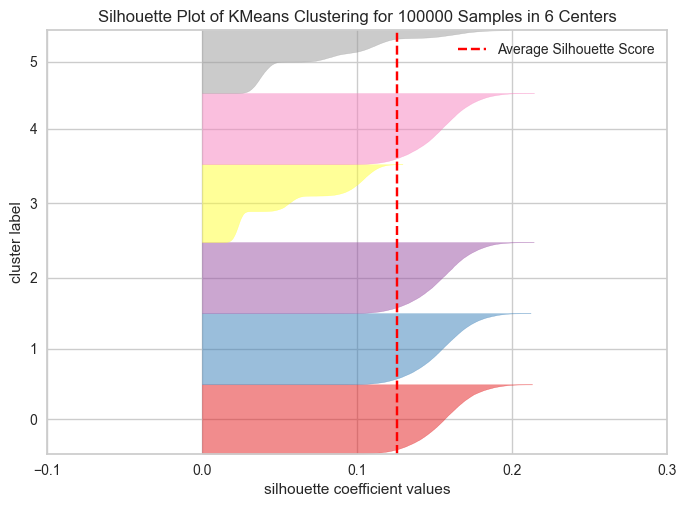

In [27]:
for i in range(2,7):
    k = KMeans(n_clusters=i,random_state=34)
    k.fit(telecom)
    silhouette_visualizer(k,telecom)

Text(0, 0.5, 'WCSS value')

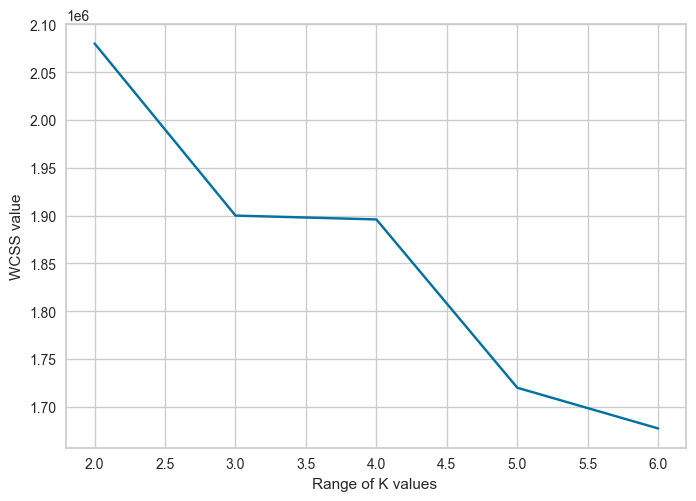

In [28]:
plt.plot(range(2,7),wcss)
plt.xlabel("Range of K values ")
plt.ylabel("WCSS value")

In [29]:
k = KMeans(n_clusters=3)

In [30]:
k.fit(telecom)

KMeans(n_clusters=3)

In [31]:
k.labels_

array([2, 0, 0, ..., 1, 0, 1], shape=(100000,), dtype=int32)

In [ ]:
Sample = pd.concat([Sample, pd.DataFrame(k.labels_,columns=["Class"])],axis=1)

In [ ]:
sns.scatterplot(x=Sample["InternetGBPerMonth"],y=Sample["TotalCharges"],hue=Sample["Class"])